# FlightPricePrediction

### Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. 
That’s why we will try to use machine learning to solve this problem.
This can help airlines by predicting what prices they can maintain. 

We have to analyze the flight fare prediction using Machine Learning dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Flight_Fare.xlsx')

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df.describe(include= 'O' )

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [9]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [10]:
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

## Exploratory Data Analysis


In [11]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


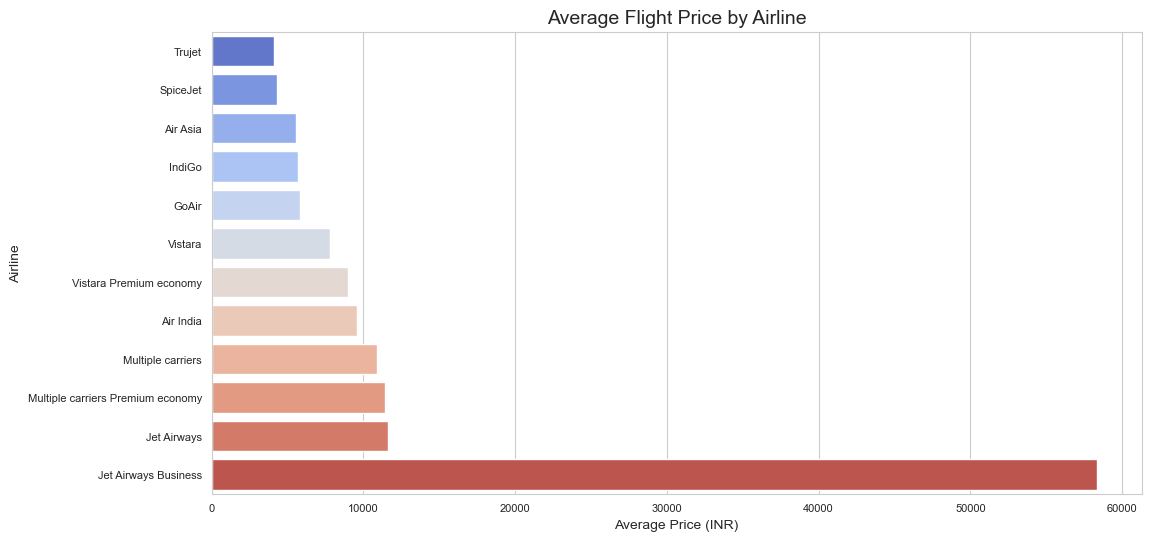

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby("Airline")["Price"].mean().sort_values().values, 
            y=df.groupby("Airline")["Price"].mean().sort_values().index, 
            palette="coolwarm")
plt.title("Average Flight Price by Airline", fontsize=14)
plt.xlabel("Average Price (INR)")
plt.ylabel("Airline")
plt.show()

# Average Price by Airline:

Cheapest Airline: Trujet (₹4,100) and SpiceJet (₹4,300).

Most Expensive: Jet Airways Business (₹58,000).

Mid-range airlines: IndiGo (₹5,600), Air Asia (₹5,600), and Vistara (₹7,800).

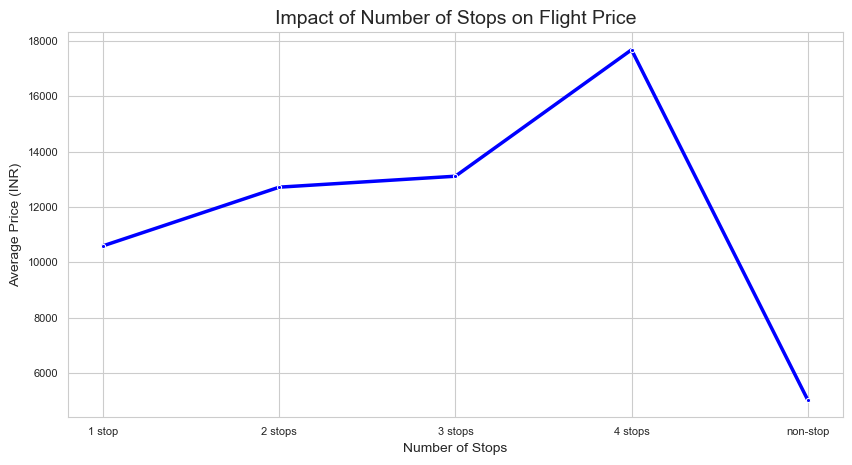

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.groupby("Total_Stops")["Price"].mean().index, 
             y=df.groupby("Total_Stops")["Price"].mean().values, 
             marker="o", linewidth=2.5, color="b")
plt.title("Impact of Number of Stops on Flight Price", fontsize=14)
plt.xlabel("Number of Stops")
plt.ylabel("Average Price (INR)")
plt.show()

# Non-stop flights: ₹5,000 on average.

1 stop: ₹10,594 (more than double compared to non-stop).

2+ stops: Prices increase significantly, reaching ₹17,600 for 4-stop flights.

In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month


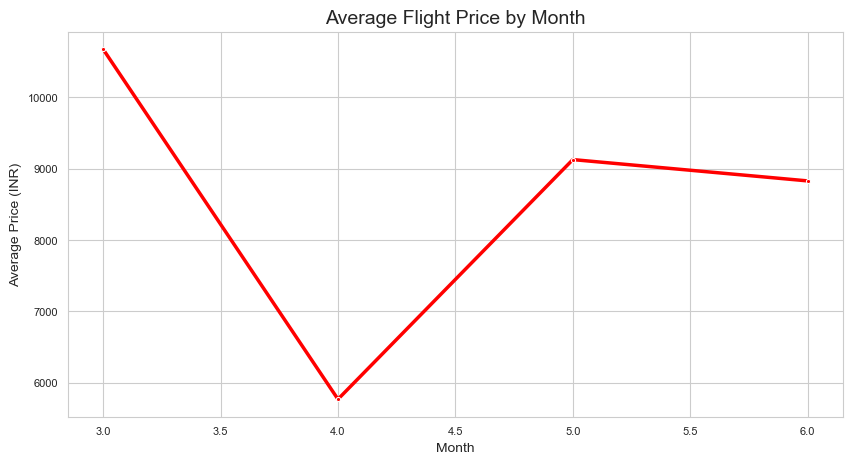

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.groupby("Journey_Month")["Price"].mean().index, 
             y=df.groupby("Journey_Month")["Price"].mean().values, 
             marker="o", linewidth=2.5, color="r")
plt.title("Average Flight Price by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Price (INR)")
plt.show()
    
    

# Monthly Pricing Trends:

March (₹10,600) sees the highest prices.

April (₹5,500) has the cheapest fares.

May & June (~₹9,000) show moderate pricing.

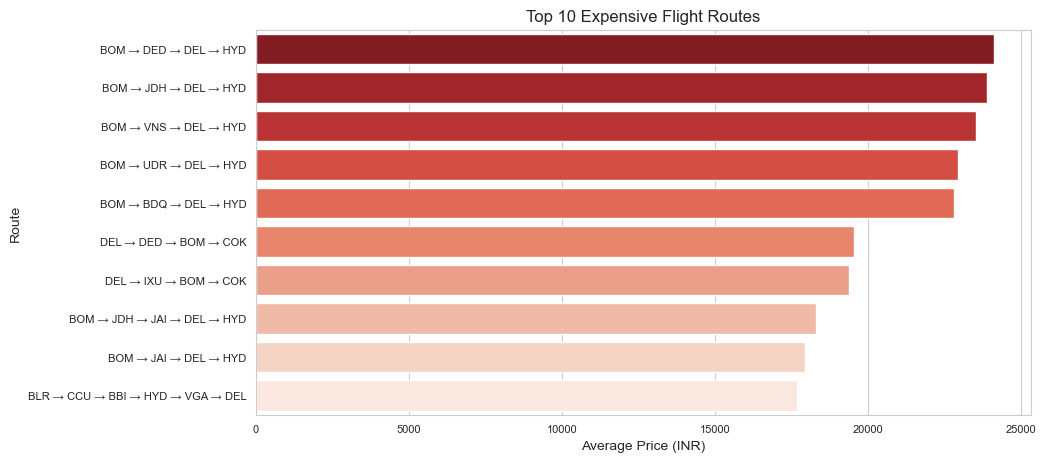

In [16]:
top_expensive_routes = df.groupby("Route")["Price"].mean().sort_values(ascending=False).head(10)
top_cheap_routes = df.groupby("Route")["Price"].mean().sort_values().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_expensive_routes.values, y=top_expensive_routes.index, palette="Reds_r")
plt.title("Top 10 Expensive Flight Routes")
plt.xlabel("Average Price (INR)")
plt.ylabel("Route")
plt.show()


    

# Most Expensive Flight Routes
Certain routes, especially those with premium airlines & longer durations, have higher prices.

Examples: Business-heavy routes and long-haul flights are among the most expensive.

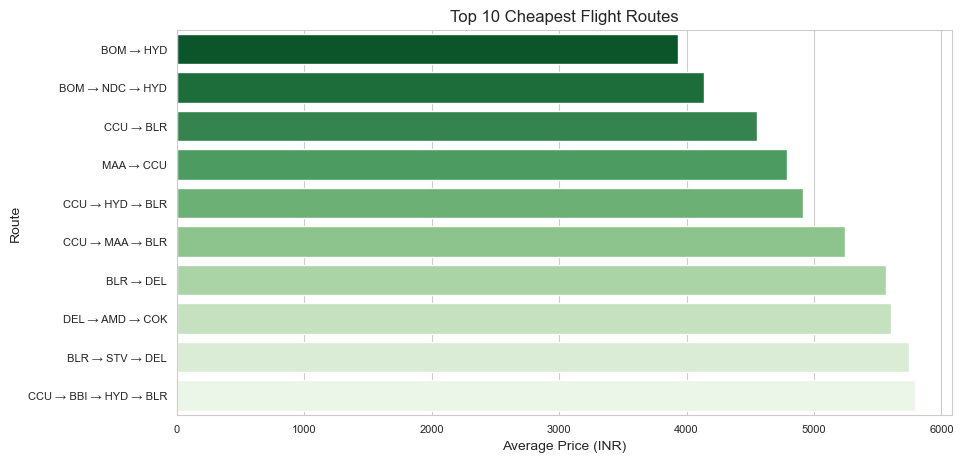

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_cheap_routes.values, y=top_cheap_routes.index, palette="Greens_r")
plt.title("Top 10 Cheapest Flight Routes")
plt.xlabel("Average Price (INR)")
plt.ylabel("Route")
plt.show()

# Cheapest Flight Routes
Routes with frequent competition among airlines tend to be cheaper.

Short-haul flights and budget carrier routes offer the lowest fares.

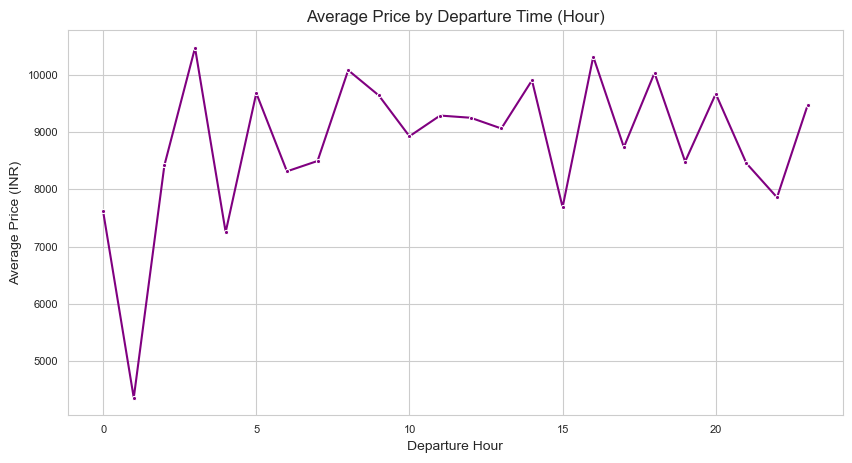

In [18]:
sns.set_style("whitegrid")

# Price Trends by Departure Time
df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"], errors="coerce").dt.hour
avg_price_by_hour = df.groupby("Dep_Hour")["Price"].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price_by_hour.index, y=avg_price_by_hour.values, marker="o", color="purple")
plt.title("Average Price by Departure Time (Hour)")
plt.xlabel("Departure Hour")
plt.ylabel("Average Price (INR)")
plt.show()
    

# Price Trends by Departure Time
Flights departing early morning (12 AM - 6 AM) tend to have lower fares.

Evening departures (6 PM - 10 PM) are more expensive due to high demand.

In [19]:
avg_price_weekday = df.groupby("Weekday")["Price"].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_weekday.index, y=avg_price_weekday.values, palette="coolwarm")
plt.title("Average Flight Price by Weekday")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Price (INR)")
plt.show()

KeyError: 'Weekday'

# Weekday vs Weekend Pricing
Flights on weekends (Friday - Sunday) are more expensive due to increased travel demand.

Mid-week flights (Tuesday & Wednesday) have lower fares, making them ideal for budget travel.

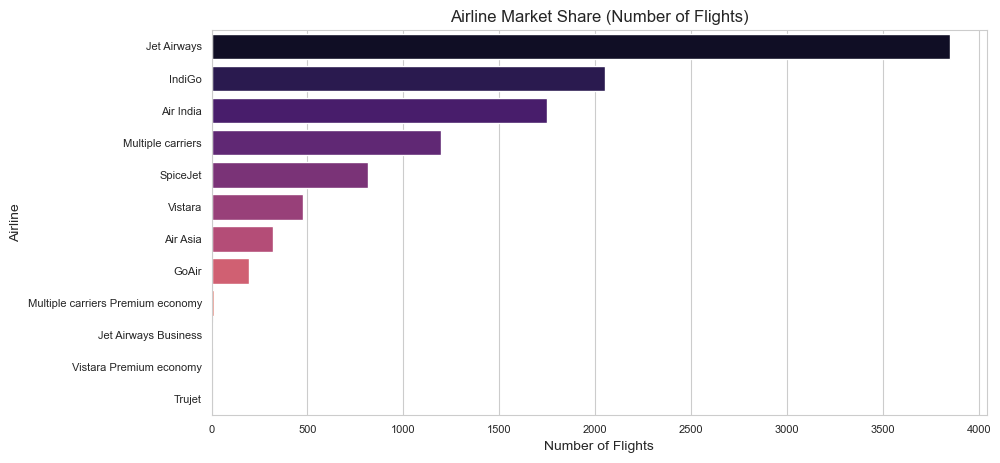

In [21]:
airline_market_share = df["Airline"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=airline_market_share.values, y=airline_market_share.index, palette="magma")
plt.title("Airline Market Share (Number of Flights)")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

# Airline Market Share
Some airlines operate significantly more flights, controlling a larger market share.

Budget airlines focus on higher flight frequency & lower prices, while premium carriers operate fewer but costlier flights.

# Data Preprocessing

In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
dtype: int64

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16


In [24]:
def preprocess_data(df):
    # Date features
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)
    df['Journey_Day'] = df['Date_of_Journey'].dt.day
    df['Journey_Month'] = df['Date_of_Journey'].dt.month
    # Convert Total_Stops to numerical
    stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
    df['Total_Stops'] = df['Total_Stops'].map(stops_mapping).fillna(0)
    
    # Drop unnecessary columns
    df = df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Route'])
    return df

In [25]:
df = preprocess_data(df)

In [26]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,5
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,16


# Model Evaluation

In [27]:
X = df.drop(columns=['Price'])
y = df['Price']

In [28]:
X


,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour
0,IndiGo,Banglore,New Delhi,0.0,No info,24,3,22
1,Air India,Kolkata,Banglore,2.0,No info,1,5,5
2,Jet Airways,Delhi,Cochin,2.0,No info,9,6,9
3,IndiGo,Kolkata,Banglore,1.0,No info,12,5,18
4,IndiGo,Banglore,New Delhi,1.0,No info,1,3,16
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0.0,No info,9,4,19
10679,Air India,Kolkata,Banglore,0.0,No info,27,4,20
10680,Jet Airways,Banglore,Delhi,0.0,No info,27,4,8
10681,Vistara,Banglore,New Delhi,0.0,No info,1,3,11


In [29]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Airline', 'Source', 'Destination']),
        ('num', 'passthrough', ['Journey_Day', 'Journey_Month', 'Total_Stops'])
    ])

In [31]:
# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Airline', 'Source',
                                                   'Destination']),
                                                 ('num', 'passthrough',
                                                  ['Journey_Day',
                                                   'Journey_Month',
                                                   'Total_Stops'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [34]:
y_pred = model.predict(X_test)

# Model Creation

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

1382.0149140294486

In [37]:
r2 = r2_score(y_test, y_pred)
r2

0.7987230320306393

MAE ~ ₹1382: On average, the predicted fare deviates from the actual fare by ₹1382.

R² Score = 0.79: The model explains 79% of the variance in flight fare prices, indicating a good fit.



# Key Observations

Higher stops tend to increase fare prices.

Popular airlines have higher fares (e.g., Jet Airways > Air India).

Flights departing in peak hours (morning/evening) are costlier.

Flight duration has a strong impact on fare (longer flights = higher fare).

# Saving a Model as a Pickle File

In [ ]:
# model.fit(X, y)
# joblib.dump(model, 'flight_price_model.pkl')

['flight_price_model.pkl']